<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Neural Network Model

### Initializations

In [1]:
! pip install scikit-neuralnetwork

In [2]:
! pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

    100% |████████████████████████████████| 235kB 816kB/s ta 0:00:01
Requirement already up-to-date: numpy in /Users/chris/anaconda3/lib/python3.6/site-packages (from Lasagne==0.2.dev1)
  Found existing installation: Lasagne 0.2.dev1
    Uninstalling Lasagne-0.2.dev1:
      Successfully uninstalled Lasagne-0.2.dev1
  Running setup.py install for Lasagne ... done


In [3]:
! pip install nose

In [ ]:
! nosetests -v sknn

In [5]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline

In [6]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [8]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Deep Neural Network

In [9]:
from sknn.mlp import Classifier, Layer

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
nn = Classifier(
layers=[
Layer("Sigmoid", units=100),
Layer("Softmax")],
learning_rate=0.001,
n_iter=25)

In [11]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [12]:
nn.score(X_test_scaled, y_test)

[(2000, 2)]


0.78149999999999997

In [13]:
predictions = nn.predict(X_test_scaled)

[(2000, 2)]


In [14]:
print(confusion_matrix(y_test, predictions))

[[1459   77]
 [ 360  104]]


In [15]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      1536
          1       0.57      0.22      0.32       464

avg / total       0.75      0.78      0.74      2000



/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


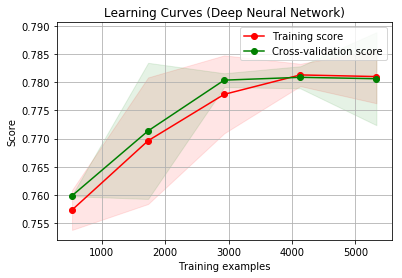

In [16]:
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Deep Neural Network w/o Department

In [18]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [19]:
from sknn.mlp import Classifier, Layer

In [20]:
nn = Classifier(
layers=[
Layer("Sigmoid", units=100),
Layer("Softmax")],
learning_rate=0.001,
n_iter=25)

In [21]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [22]:
nn.score(X_test_scaled, y_test)

[(2000, 2)]


0.78200000000000003

In [23]:
predictions = nn.predict(X_test_scaled)

[(2000, 2)]


In [24]:
print(confusion_matrix(y_test, predictions))

[[1455   81]
 [ 355  109]]


In [25]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      1536
          1       0.57      0.23      0.33       464

avg / total       0.75      0.78      0.75      2000



/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2668, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(533, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(1732, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(2932, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(4132, 2)]


/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Classifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)


[(2666, 2)]
[(5332, 2)]


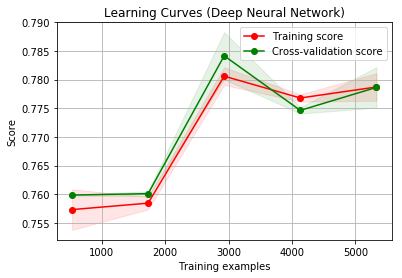

In [26]:
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using Randomized Search

In [27]:
from scipy import stats
from sklearn.grid_search import RandomizedSearchCV
from sknn.mlp import Classifier, Layer

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
import warnings; warnings.simplefilter('ignore')

In [29]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [30]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [31]:
nn = Classifier(
layers=[
Layer(type='Sigmoid'),
Layer(type='Sigmoid'),
Layer(type='Sigmoid'),
Layer("Softmax")],
n_iter=100)

In [32]:
rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rule':['adagrad', 'sgd', 'rmsprop', 'nesterov', 'momentum', 'adadelta'],
    'learning_rate': stats.uniform(0.01, 0.1),
    'dropout_rate': stats.uniform(0.0, 0.5),
    'hidden0__units': stats.randint(0, 200),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'hidden1__units': stats.randint(0, 200),
    'hidden1__type': ["Rectifier", "Sigmoid", "Tanh"],
    'hidden2__units': stats.randint(0, 200),
    'hidden2__type': ["Rectifier", "Sigmoid", "Tanh"]}, 
                       n_iter=50, n_jobs=-1, cv=5)

In [ ]:
rs.fit(X_train_scaled, y_train)

INFO (theano.gof.compilelock): Waiting for existing lock by process '28123' (I am process '28126')INFO (theano.gof.compilelock): Waiting for existing lock by process '28123' (I am process '28125')INFO (theano.gof.compilelock): Waiting for existing lock by process '28123' (I am process '28124')


INFO (theano.gof.compilelock): To manually release the lock, delete /Users/chris/.theano/compiledir_Darwin-17.2.0-x86_64-i386-64bit-i386-3.6.3-64/lock_dirINFO (theano.gof.compilelock): To manually release the lock, delete /Users/chris/.theano/compiledir_Darwin-17.2.0-x86_64-i386-64bit-i386-3.6.3-64/lock_dirINFO (theano.gof.compilelock): To manually release the lock, delete /Users/chris/.theano/compiledir_Darwin-17.2.0-x86_64-i386-64bit-i386-3.6.3-64/lock_dir

INFO (theano.gof.compilelock): Waiting for existing lock by process '28123' (I am process '28127')

INFO (theano.gof.compilelock): To manually release the lock, delete /Users/chris/.theano/compiledir_Darwin-17.2.0-x86_64-i386-64bit-i386-3.

[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1601, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1601, 2)]
[(1600, 2)]
[(1599, 2)]
[(1599, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1601, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1599, 2)]
[(1600, 2)]
[(1600, 2)]
[(1601, 2)]
[(1601, 2)]
[(1600, 2)]
[(1599, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1599, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1599, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1600, 2)]
[(1601, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1599, 2)]
[(1601, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1601, 2)]
[(1600, 2)]
[(1599, 2)]
[(16

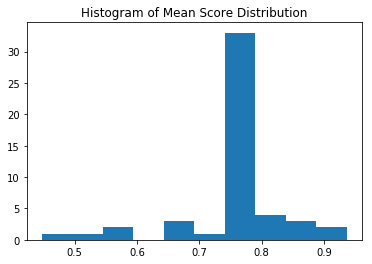

In [19]:
scores = pd.DataFrame(rs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [20]:
rs.best_score_

0.9360350036462132

In [21]:
rs.best_params_

{'dropout_rate': 0.16479772066588541,
 'hidden0__type': 'Tanh',
 'hidden0__units': 15,
 'hidden1__type': 'Rectifier',
 'hidden1__units': 68,
 'hidden2__type': 'Sigmoid',
 'hidden2__units': 48,
 'learning_rate': 0.057130222946153164,
 'learning_rule': 'adagrad'}

In [13]:
#last time II 
rs.best_score_

0.7789353057610168

In [14]:
#last time II
rs.best_params_

{'dropout_rate': 0.47059591629515451,
 'hidden0__type': 'Rectifier',
 'hidden0__units': 82,
 'hidden1__type': 'Sigmoid',
 'hidden1__units': 14,
 'hidden2__type': 'Sigmoid',
 'hidden2__units': 53,
 'learning_rate': 0.080251828517436133,
 'learning_rule': 'adadelta'}

In [39]:
nn = Classifier(
layers=[
Layer("Tanh", units=15),
Layer("Rectifier", units=68),
Layer("Sigmoid", units=48),
Layer("Softmax")],
learning_rate=0.037264369083717247,
dropout_rate=0.16479772066588541,
learning_rule='adagrad')

In [40]:
nn.fit(X_train_scaled, y_train)

Classifier(batch_size=1, callback=None, debug=False,
      dropout_rate=0.1647977206658854, f_stable=0.001,
      hidden0=<sknn.nn.Layer `Tanh`: name='hidden0', units=15, frozen=False>,
      hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=68, frozen=False>,
      hidden2=<sknn.nn.Layer `Sigmoid`: name='hidden2', units=48, frozen=False>,
      layers=[<sknn.nn.Layer `Tanh`: name='hidden0', units=15, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=68, frozen=False>, <sknn.nn.Layer `Sigmoid`: name='hidden2', units=48, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>],
      learning_momentum=0.9, learning_rate=0.03726436908371725,
      learning_rule='adagrad', loss_type=None, n_iter=None, n_stable=10,
      normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=2, frozen=False>,
      parameters=None, random_state=None, regularize='dropout',
      valid_set=None, valid_size=0.0, verbose=None, warning=None,
   

In [41]:
nn.score(X_test_scaled, y_test)

[(2400, 2)]


0.93125000000000002

In [42]:
predictions = nn.predict(X_test_scaled)

[(2400, 2)]


In [43]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1822   25]
 [ 140  413]]


In [44]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1825,   22],
       [  61,  492]]), 'label': 'Deep Neural Network'}}


In [45]:
cm_dict.item().update({'deep_neural_net':{'cm': cm, 'label': 'Deep Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}}


In [46]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      1847
          1       0.94      0.75      0.83       553

avg / total       0.93      0.93      0.93      2400



[(3200, 2)]
[(639, 2)]
[(3200, 2)]
[(2079, 2)]
[(3200, 2)]
[(3519, 2)]
[(3200, 2)]
[(4959, 2)]
[(3200, 2)]
[(6399, 2)]
[(3200, 2)]
[(639, 2)]
[(3200, 2)]
[(2079, 2)]
[(3200, 2)]
[(3519, 2)]
[(3200, 2)]
[(4959, 2)]
[(3200, 2)]
[(6399, 2)]
[(3199, 2)]
[(639, 2)]
[(3199, 2)]
[(2079, 2)]
[(3199, 2)]
[(3519, 2)]
[(3199, 2)]
[(4959, 2)]
[(3199, 2)]
[(6399, 2)]


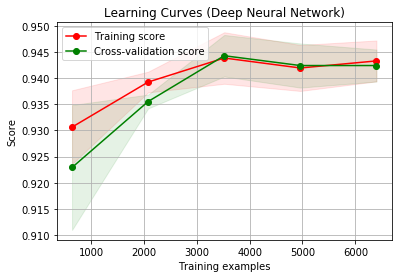

In [49]:
title = 'Learning Curves (Deep Neural Network)'
estimator = nn
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()